# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
# The trip_records and the taxi_zones folder are in line with the jupyter notebook. Folder structure maintained as below
# ../EDA_Assg_NYC_Taxi_Starter
# ../trip_records
# ../trip_records/2023-1.parquet
# ../taxi_zones
df = pd.read_parquet('trip_records/2023-1.parquet')

# The 2023-1.parquet file had the column name as "airport_fee" while all other files had a column name as "Airport_fee"
# I modified the column name in 2023-1.parquet file to reflect "Airport_fee"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041714 entries, 0 to 3041713
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# List to collect sampled data
all_sampled_data = []

# Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
## df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file_path = os.path.join(folder_path, file_name)
        print(f"Processing file: {file_name}")
        
        # Read the parquet file
        df = pd.read_parquet(file_name)
    
        # Get unique dates in the file
        unique_dates = df['tpep_pickup_datetime'].dt.date.unique()
    
        # Loop through each date
        for date in unique_dates:
            daily_data = df[df['tpep_pickup_datetime'].dt.date == date]
    
            # Loop through each hour (0–23)
            for hour in range(24):
                hourly_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]
    
                # If there's data in this hour, sample 5%
                if not hourly_data.empty:
                    sample = hourly_data.sample(frac=0.05, random_state=42)
                    all_sampled_data.append(sample)
    
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Combine all sampled data into one DataFrame
sampled_df = pd.concat(all_sampled_data, ignore_index=True)

# Print preview - A sample of the concatenated data
print(sampled_df.head())

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1   

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [16]:
# Store the df in csv/parquet
# df.to_parquet('')

# Created both a parquet and a csv file and stored it along with the Notebook 

sampled_df.to_parquet('../EDA_Assg_Taxi_Sample_Data.parquet', index=False)

sampled_df.to_csv('../EDA_Assg_Taxi_Sample_Data.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file created with a sample of the data

df = pd.read_parquet('EDA_Assg_Taxi_Sample_Data.parquet')


In [5]:
# df.head()

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN


In [6]:
# df.info()

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [7]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [8]:
# Combine the two airport fee columns

# I did this by renaming the column in 2023-1.parquet file only as all the other files had the name as Airport_fee 
# and then using that file to get the sample data. This step was done earlier, just mentioning the code here to showcase 
# what was done

# Step 1: Read the Parquet file
# df = pd.read_parquet('trip_records/2023-1.parquet')

# Step 2: Rename just one column (others remain unchanged)
# df.rename(columns={'airport_fee': 'Airport_fee'}, inplace=True)

# Step 3: Save the updated DataFrame to a new Parquet file
# df.to_parquet('2023-1.parquet', index=False)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [9]:
# check where values of fare amount are negative
df_check = df[df['fare_amount'] < 0]
df_check.count()

# The sample data does not have any records with fare_amount as negative

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [10]:
df_check = df[df['fare_amount'] <= 0]
df_check.count()

# There are some records with fare amount = 0. 

VendorID                 651
tpep_pickup_datetime     651
tpep_dropoff_datetime    651
passenger_count          635
trip_distance            651
RatecodeID               635
store_and_fwd_flag       635
PULocationID             651
DOLocationID             651
payment_type             651
fare_amount              651
extra                    651
mta_tax                  651
tip_amount               651
tolls_amount             651
improvement_surcharge    651
total_amount             651
congestion_surcharge     635
Airport_fee              635
dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [11]:
# Analyse RatecodeID for the negative fare amounts



In [12]:
# Find which columns have negative values

# the following columns have negative values 
# mta_tax, total_amount, congestion_surcharge, Airport_fee

# code to check is as follows
df_check = df[df['Airport_fee'] < 0]
df_check.count()


VendorID                 15
tpep_pickup_datetime     15
tpep_dropoff_datetime    15
passenger_count          15
trip_distance            15
RatecodeID               15
store_and_fwd_flag       15
PULocationID             15
DOLocationID             15
payment_type             15
fare_amount              15
extra                    15
mta_tax                  15
tip_amount               15
tolls_amount             15
improvement_surcharge    15
total_amount             15
congestion_surcharge     15
Airport_fee              15
dtype: int64

In [13]:
# fix these negative values

# Converting these values to positive values
df['mta_tax'] = df['mta_tax'].abs()
df['total_amount'] = df['total_amount'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()
df['Airport_fee'] = df['Airport_fee'].abs()


In [14]:
# code to check is as follows
df_check = df[df['Airport_fee'] < 0]
df_check.count()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [15]:
# The negative values have been taken care of

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [16]:
# Find the proportion of missing values in each column

df.isna().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
Airport_fee              0.034209
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [17]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df['passenger_count'].isnull().sum()

# There are around 64874 null values

64874

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [18]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'].isnull().sum()

# There are around 64874 null values

64874

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [19]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].isnull().sum()

# There are around 64874 null values


64874

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [20]:
# Handle any remaining missing values

df['store_and_fwd_flag'].isnull().sum()

# There are around 64874 null values

64874

In [21]:
# Handle any remaining missing values

df['Airport_fee'].isnull().sum()

# There are around 64874 null values

64874

In [22]:
# NaN values were found in the following columns
# passenger_count, RatecodeID, congestion_surcharge, store_and_fwd_flag, Airport_fee

# The NaN values is for the records --> 64874


In [23]:
# Dropping the NaN records. Since they are very few records as compared to the dataset in consideration
# Trying by removing the NaN values based on one field --> passenger_count being NaN

df = df[~df['passenger_count'].isnull()]
df.count()

VendorID                 1831526
tpep_pickup_datetime     1831526
tpep_dropoff_datetime    1831526
passenger_count          1831526
trip_distance            1831526
RatecodeID               1831526
store_and_fwd_flag       1831526
PULocationID             1831526
DOLocationID             1831526
payment_type             1831526
fare_amount              1831526
extra                    1831526
mta_tax                  1831526
tip_amount               1831526
tolls_amount             1831526
improvement_surcharge    1831526
total_amount             1831526
congestion_surcharge     1831526
Airport_fee              1831526
dtype: int64

In [24]:
# Fixing the index after the removal of NaN records

df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831526 entries, 0 to 1831525
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [25]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [26]:
# remove passenger_count > 6
df = df[~(df['passenger_count'] > 6)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831505 entries, 0 to 1831504
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [27]:
# Removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
# (both distance and fare should not be zero for different zones)

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df.reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831445 entries, 0 to 1831444
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [28]:
# Removing entries where trip_distance is nearly 0 and fare_amount is more than 300

df = df[~((df['trip_distance'] <= 1) & (df['fare_amount'] > 300))]
df = df.reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831407 entries, 0 to 1831406
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [29]:
# Removing entries where trip_distance is more than 250 miles.

df = df[~((df['trip_distance'] > 250))]
df = df.reset_index(drop=True)


In [30]:
# Checking for Payment Type Outliers. There are no values that are other than those defined

df['payment_type'].value_counts()

payment_type
1    1492299
2     316411
4      13672
3       9006
Name: count, dtype: int64

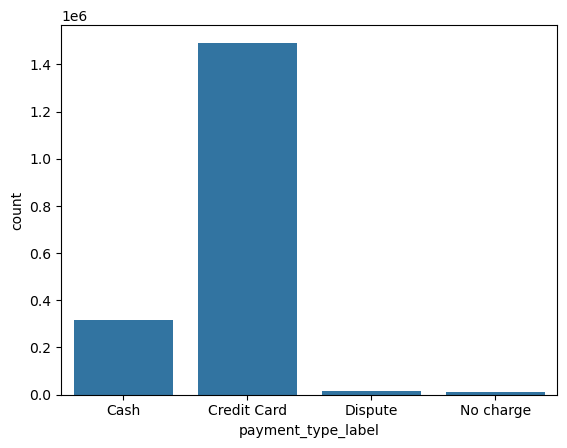

In [31]:
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Vodied Trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_map)

sns.countplot(x=df['payment_type_label'])
plt.show()

# Credit card as a source of payment for maximum number of trips

In [32]:
# Checking for entries where the drop off time is earlier than the pick up time

df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
invalid_rows = df[df['duration'].notna() & (df['duration'] < pd.Timedelta(0))]
invalid_rows.count()

VendorID                 43
tpep_pickup_datetime     43
tpep_dropoff_datetime    43
passenger_count          43
trip_distance            43
RatecodeID               43
store_and_fwd_flag       43
PULocationID             43
DOLocationID             43
payment_type             43
fare_amount              43
extra                    43
mta_tax                  43
tip_amount               43
tolls_amount             43
improvement_surcharge    43
total_amount             43
congestion_surcharge     43
Airport_fee              43
payment_type_label       43
duration                 43
dtype: int64

In [33]:
# Removing the invalid rows

df = df[~(df['duration'].notna() & (df['duration'] < pd.Timedelta(0)))]
df = df.reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831345 entries, 0 to 1831344
Data columns (total 21 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[us] 
 2   tpep_dropoff_datetime  datetime64[us] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  Ai

In [34]:
# Continue with outlier handling

# There are some records with RatecodeID = 99. Will remove these entries.

df = df[~(df['RatecodeID'] == 99)]

df['RatecodeID'].value_counts()


RatecodeID
1.0    1729169
2.0      71667
5.0      10201
3.0       6124
4.0       3723
6.0          3
Name: count, dtype: int64

In [35]:
# Do any columns need standardising?

# No columns need to be standardised

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'payment_type_label',
 'duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: CATEGORICAL
* `tpep_pickup_datetime`: CATEGORICAL
* `tpep_dropoff_datetime`: CATEGORICAL
* `passenger_count`: NUMERICAL
* `trip_distance`: NUMERICAL
* `RatecodeID`: CATEGORICAL
* `PULocationID`: CATEGORICAL
* `DOLocationID`: CATEGORICAL
* `payment_type`: CATEGORICAL
* `pickup_hour`: CATEGORICAL
* `trip_duration`: NUMERICAL


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : NUMERICAL
* `extra` : CATEGORICAL
* `mta_tax` : NUMERICAL
* `tip_amount` : NUMERICAL
* `tolls_amount` : NUMERICAL
* `improvement_surcharge` : NUMERICAL
* `total_amount` : NUMERICAL
* `congestion_surcharge` : NUMERICAL
* `airport_fee` : NUMERICAL

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [37]:
# Getting the hour, day of the week and the month for the pick up date

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.strftime('%A')   # e.g., Mon, Tue
df['pickup_month'] = df['tpep_pickup_datetime'].dt.strftime('%B')
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

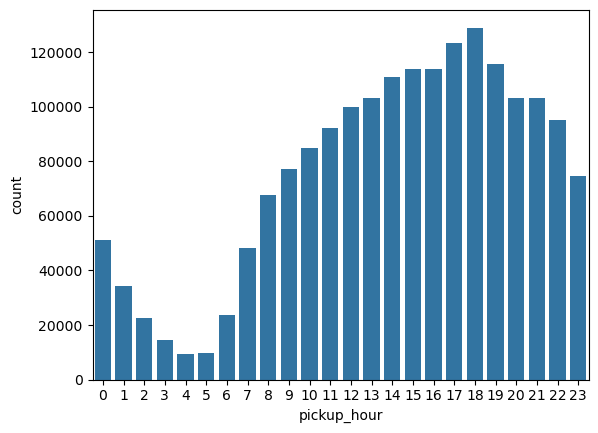

In [38]:
# Find and show the hourly trends in taxi pickups
sns.countplot(x=df['pickup_hour'])
plt.show()


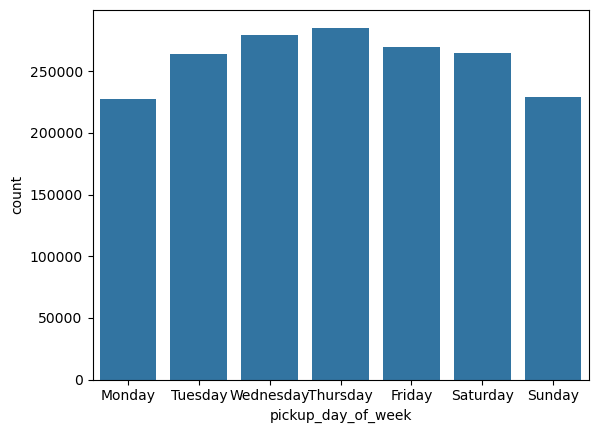

In [39]:
# Find and show the daily trends in taxi pickups (days of the week)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['pickup_day_of_week'] = pd.Categorical(df['pickup_day_of_week'], categories=week_order, ordered=True)


sns.countplot(x=df['pickup_day_of_week'])
plt.show()


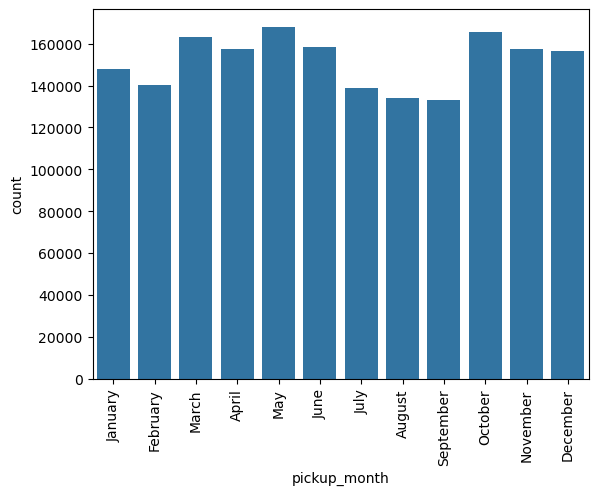

In [40]:
# Show the monthly trends in pickups

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['pickup_month'] = pd.Categorical(df['pickup_month'], categories=month_order, ordered=True)

sns.countplot(x=df['pickup_month'])
plt.xticks(rotation=90)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [41]:
# Analyse the above parameters



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [42]:
# Create a df with non zero entries for the selected parameters.
df = df[ ~ ((df['trip_distance'] == 0) & ( df['PULocationID'] == df['DOLocationID']))]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

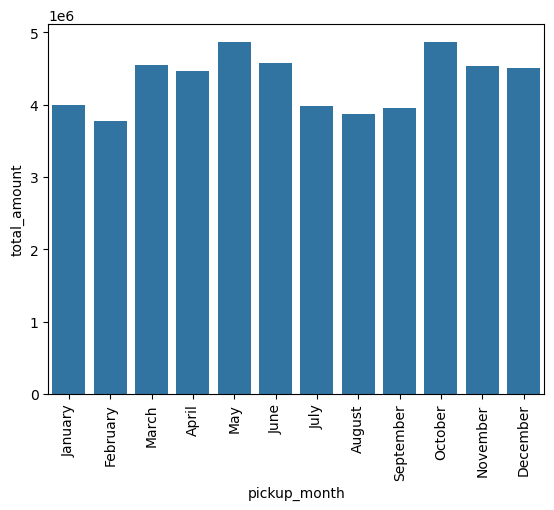

In [43]:
# Group data by month and analyse monthly revenue

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue['pickup_month'] = pd.Categorical(monthly_revenue['pickup_month'], categories=month_order, ordered=True)

sns.barplot(x = monthly_revenue['pickup_month'], y = monthly_revenue['total_amount'])
plt.xticks(rotation=90)
plt.show()

# ** will work on showing M or K depending on the total_amount values, as of now it is showing as 1e6 **

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

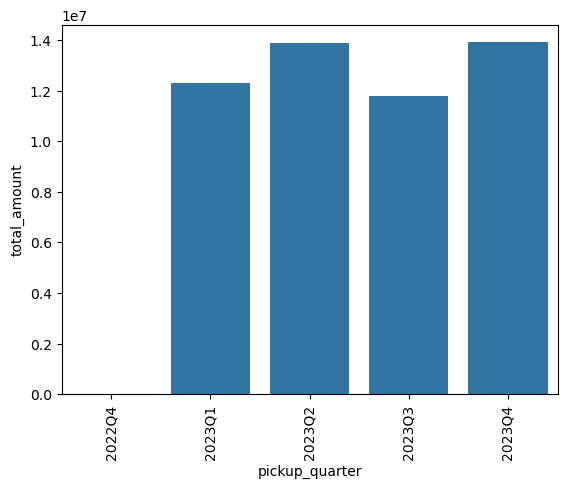

In [44]:
# Calculate proportion of each quarter

quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()
sns.barplot(x = quarterly_revenue['pickup_quarter'], y = quarterly_revenue['total_amount'])
plt.xticks(rotation=90)
plt.show()

# 2022Q4 shows because there is 1 record for the year 2022 Q4
# ** will work on showing M or K depending on the total_amount values, as of now it is showing as 1e7 **

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

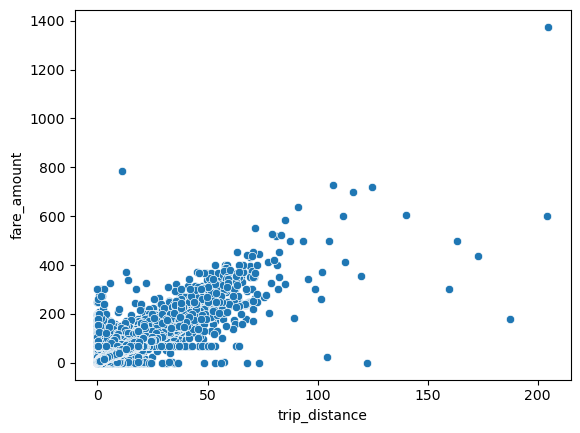

In [45]:
# Show how trip fare is affected by distance

filtered_df = df[(df['trip_distance'] > 0)]
sns.scatterplot(x=filtered_df["trip_distance"], y=filtered_df["fare_amount"])
plt.show()


In [46]:
# Correlation Value between 'trip_distance' and 'fare_amount'

correlation_val = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print (correlation_val)

0.9446276145102345


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

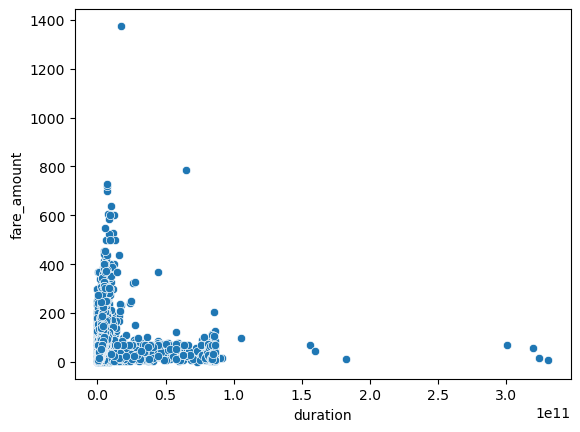

In [47]:
# Show relationship between fare and trip duration

sns.scatterplot(x=filtered_df["duration"], y=filtered_df["fare_amount"])
plt.show()

In [48]:
# Correlation Value between 'duration' and 'fare_amount'

correlation_val = df['duration'].corr(df['fare_amount'])
print (correlation_val)

0.2721011168444771


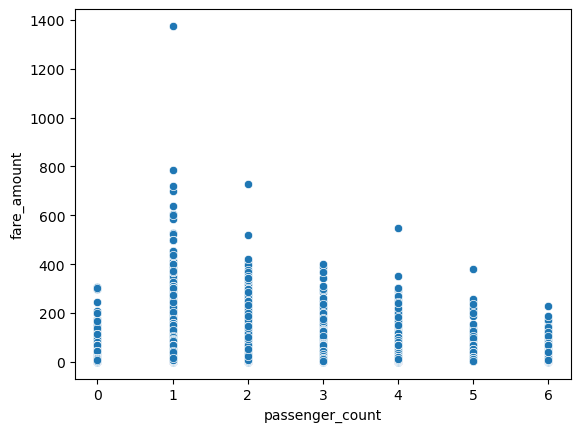

In [49]:
# Show relationship between fare and number of passengers

sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"])
plt.show()

In [50]:
# Correlation Value between 'passenger count' and 'fare_amount'

correlation_val = df['passenger_count'].corr(df['fare_amount'])
print (correlation_val)

0.04556574067021421


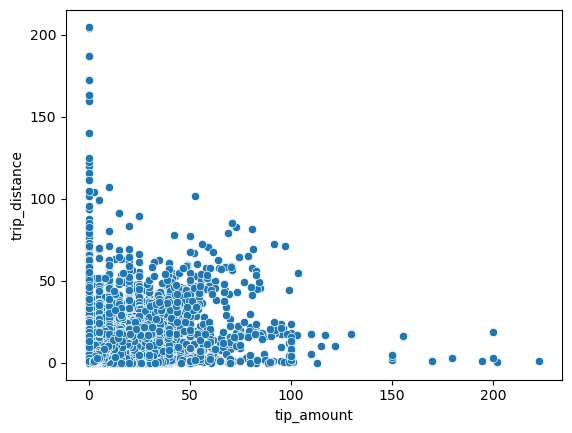

In [51]:
# Show relationship between tip and trip distance

sns.scatterplot(x=df["tip_amount"], y=df["trip_distance"])
plt.show()

In [52]:
# Correlation Value between 'tip' and 'trip distance'

correlation_val = df['tip_amount'].corr(df['trip_distance'])
print (correlation_val)

0.5931004410034865


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

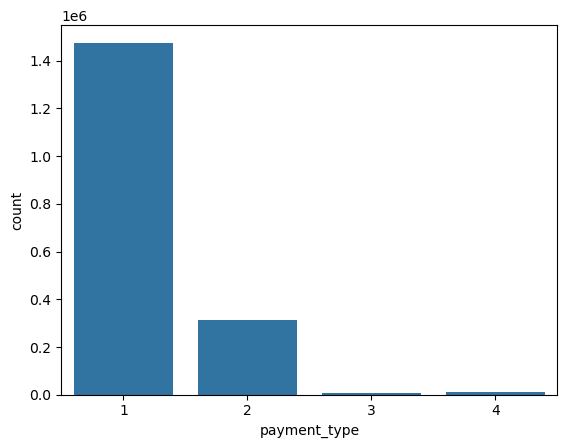

In [53]:
# Analyse the distribution of different payment types (payment_type).

sns.countplot(x=df['payment_type'])
plt.show()


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1805730 entries, 0 to 1831344
Data columns (total 26 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[us] 
 2   tpep_dropoff_datetime  datetime64[us] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  Airport

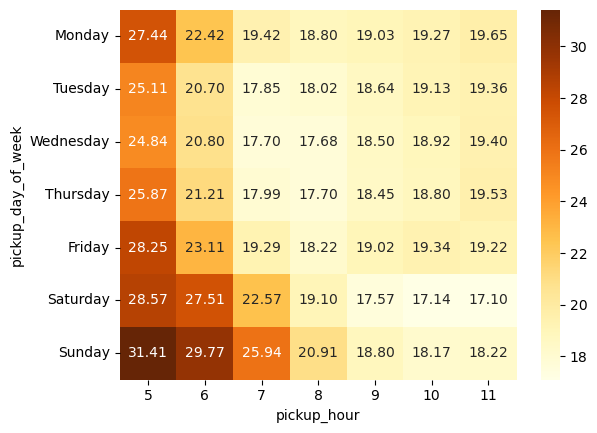

In [55]:
# Checking for average fare across the hour per weekday

morning_pickup_df = df[(df['pickup_hour'] >=5  ) & (df['pickup_hour'] <12 ) ]

groupedby_fare = morning_pickup_df.groupby(['pickup_day_of_week', 'pickup_hour'])['fare_amount'].mean().reset_index()

heatmap_data = groupedby_fare.pivot(index='pickup_day_of_week', columns='pickup_hour', values='fare_amount')

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

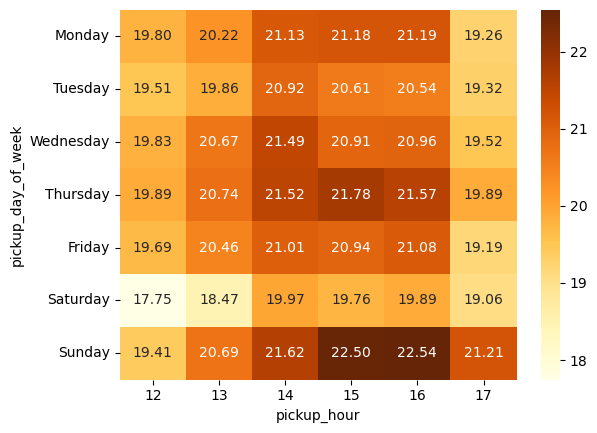

In [56]:
morning_pickup_df = df[(df['pickup_hour'] >=12  ) & (df['pickup_hour'] <18 ) ]

groupedby_fare = morning_pickup_df.groupby(['pickup_day_of_week', 'pickup_hour'])['fare_amount'].mean().reset_index()

heatmap_data = groupedby_fare.pivot(index='pickup_day_of_week', columns='pickup_hour', values='fare_amount')

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

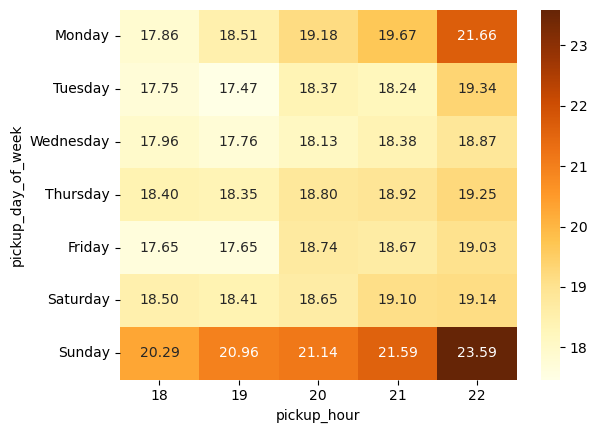

In [57]:
morning_pickup_df = df[(df['pickup_hour'] >=18  ) & (df['pickup_hour'] <23 ) ]

groupedby_fare = morning_pickup_df.groupby(['pickup_day_of_week', 'pickup_hour'])['fare_amount'].mean().reset_index()

heatmap_data = groupedby_fare.pivot(index='pickup_day_of_week', columns='pickup_hour', values='fare_amount')

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

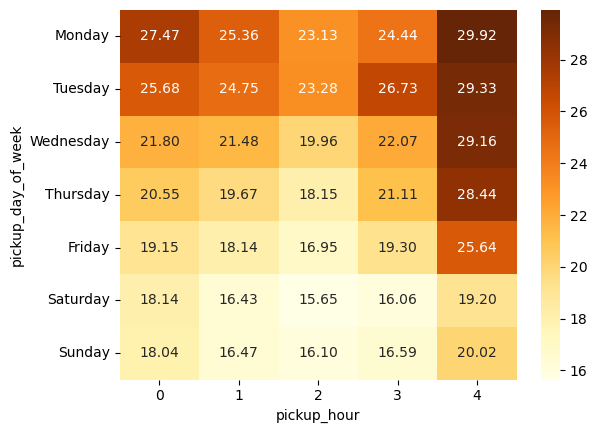

In [58]:
morning_pickup_df = df[(df['pickup_hour'] >=0  ) & (df['pickup_hour'] <5 ) ]

groupedby_fare = morning_pickup_df.groupby(['pickup_day_of_week', 'pickup_hour'])['fare_amount'].mean().reset_index()

heatmap_data = groupedby_fare.pivot(index='pickup_day_of_week', columns='pickup_hour', values='fare_amount')

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
# !pip install geopandas



**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [115]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas

zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [116]:
# print(zones.info())
# zones.plot()

print (zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

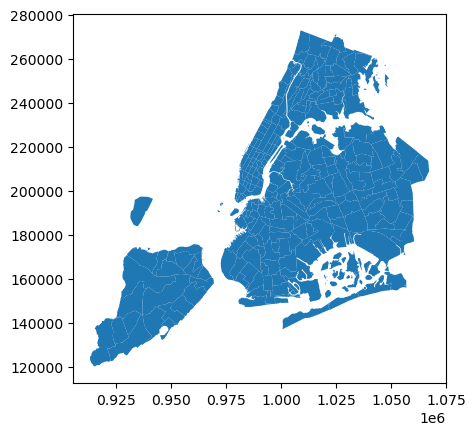

In [62]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [117]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(filtered_df, zones, left_on='PULocationID', right_on='LocationID', how='inner')

In [118]:
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,pickup_year,pickup_quarter,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,January,2023,2023Q1,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,January,2023,2023Q1,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,January,2023,2023Q1,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,January,2023,2023Q1,143,0.054180,0.000151,Lincoln Square West,143,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,January,2023,2023Q1,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [122]:
# Group data by location and calculate the number of trips

locid_count_df = merged_df.groupby(['LocationID']).size().reset_index(name='count')
locid_count_df.sort_values(by='count', ascending=False).head()




,LocationID,count
120,132,94987
222,237,86461
149,161,85384
221,236,77099
150,162,65196


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [123]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, locid_count_df, left_on='LocationID', right_on='LocationID', how='inner')
zones.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",47
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2
2,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1781
3,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",22
4,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",685


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [67]:
# Define figure and axis


# Plot the map and display it

# I was not able to get this to work 

In [68]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


**General Analysis based on the sample data**

* Busiest hours

->> Evening between 4 pm and 7 pm

* Busiest Days

->> Wednesday & Thursday

* Busiest Months

->> March, May & October


* Trends in revenue collected

->> There is an uptick in revenue collected in the month of May and October, however there is a drop in the months of July, August and September.

* How fare depends on trip distance, trip duration and passenger counts ?

->> Fare increases with increae in trip distance

->> It is difficult to conclude a relationship on the trip_duration and fare.

->> The correlation between fare and passenger count is same for different passenger counts.










#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [124]:
# Calculating a column to get the trip duration in minutes, will be required later in the calculation

merged_df['trip_duration_min'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds()/60

In [125]:
# Getting the average trip duration by the hour and then renaming 

avg_duration_by_hour = merged_df.groupby('pickup_hour')['trip_duration_min'].mean().reset_index()

# Renaming the column as we want to merge that column into the main df

avg_duration_by_hour.rename(columns={'trip_duration_min': 'avg_duration_min'}, inplace=True)

In [126]:
# Merging the avg_duration_hour df into the main df, so that we have the average duration for every record grouped by the hour

merged_df = merged_df.merge(avg_duration_by_hour, on='pickup_hour', how='inner')

In [127]:
# Calculating the average trip speed for every trip using the average duration for that hour

merged_df['trip_speed'] = merged_df['trip_distance'] / merged_df['avg_duration_min']

In [128]:
# Getting info at a route level for every hour

groupedby_route = merged_df.groupby(['PULocationID','zone','DOLocationID','pickup_hour']).agg(
    avg_duration_min = ('trip_duration_min', 'mean'),
    trip_count = ('trip_duration_min', 'count')
).reset_index()

In [129]:
# groupedby_route.describe()
groupedby_route[groupedby_route['trip_count']>10].sort_values('avg_duration_min', ascending=False).head(25)        


# groupedby_route.sort_values('avg_duration_min', ascending=False).head(25)

,PULocationID,zone,DOLocationID,pickup_hour,avg_duration_min,trip_count
40787,132,JFK Airport,7,0,258.044203,23
73239,163,Midtown North,140,6,166.837963,18
43723,132,JFK Airport,158,6,163.016667,12
108456,246,West Chelsea/Hudson Yards,1,14,162.750000,11
44331,132,JFK Airport,189,7,159.980000,15
111434,249,West Village,141,14,159.540909,11
67624,161,Midtown Center,1,18,159.030556,12
1780,12,Battery Park,161,15,155.739394,11
28188,90,Flatiron,140,17,153.928788,11
24643,87,Financial District North,48,14,152.333333,12


In [130]:
# groupedby_route.to_csv('Route_Hour_Avg_Duration_Count.csv')

In [131]:
groupedby_route.describe()

,PULocationID,DOLocationID,pickup_hour,avg_duration_min,trip_count
count,118344.000000,118344.000000,118344.000000,118344.000000,118344.000000
mean,149.340220,144.218718,12.674973,24.056745,15.065445
std,69.409164,76.901718,6.916042,40.242114,34.677303
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,93.000000,79.000000,7.000000,12.750000,1.000000
50%,143.000000,144.000000,13.000000,20.144152,3.000000
75%,226.000000,224.000000,19.000000,29.244444,13.000000
max,263.000000,265.000000,23.000000,5522.433333,1104.000000


In [172]:
# Find routes which have the slowest speeds at different times of the day

groupedby_route = merged_df.groupby(['pickup_hour']).agg(
    avg_speed_min = ('trip_speed', 'mean'),
    trip_count = ('trip_speed', 'count')
).reset_index()

groupedby_route.head(24)

,pickup_hour,avg_speed_min,trip_count
0,0,0.246214,49520
1,1,0.229829,33136
2,2,0.225920,21714
3,3,0.248318,14093
4,4,0.307760,8725
5,5,0.380226,9184
6,6,0.308910,23032
7,7,0.232732,46963
8,8,0.197917,65732
9,9,0.188974,75233


In [133]:
# Displaying the trips which are the slowest, based on the data it shows that evening trips are the slowest

slowest_trips = groupedby_route.sort_values(by='avg_speed_min', ascending=True)

slowest_trips.head(25)

# Some interesting trends seen are 
# Expected slowness during the morning and evening work hours around 2 pm - 6 pm and 8 am, 9 am
# But there is data also showing slowness during afternoon hours (lunch hours)

,pickup_hour,avg_speed_min,trip_count
17,17,0.172616,120711
16,16,0.174117,111345
15,15,0.175627,111356
18,18,0.178747,126500
14,14,0.179500,108541
11,11,0.179971,90053
13,13,0.180936,101160
12,12,0.181696,97815
10,10,0.186843,82856
9,9,0.192633,75656


How does identifying high-traffic, high-demand routes help us?

* Answer

* * Identifyng the high-traffic, high-demand routes can help decide the number of taxis to be made available during that time as per the routes. 
  * It can help plan for alternate routes if available, where the duration taken for the trip could be same, but could come at a higher cost because of the increase in the distance
  * It can also help the customers to plan their trips to avoid their trips during those durations if possible.
  * 


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

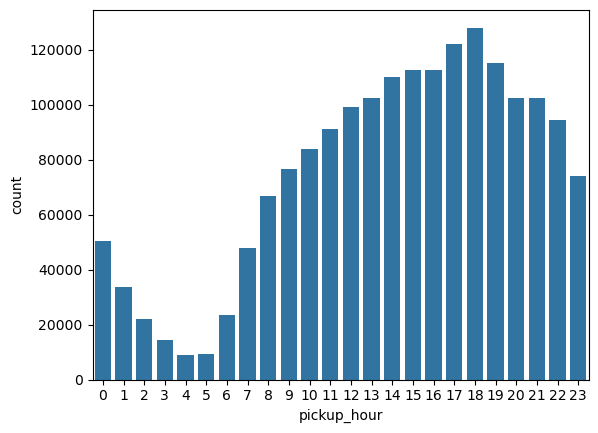

In [134]:
# Visualise the number of trips per hour and find the busiest hour

sns.countplot(x=df['pickup_hour'])
plt.show()

# Busiest hour is 6 pm

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [135]:
# Sample size

merged_df.shape[0]

1782905

In [136]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

# We took a sample size of 5% per hour per day per month
sample_fraction = 0.05

# we need to extrapolate the results to consider the entire data set 

scaling_factor = 1 / 0.05

estimated_trip_count = merged_df.shape[0] * scaling_factor

print (int(estimated_trip_count))

35658100


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

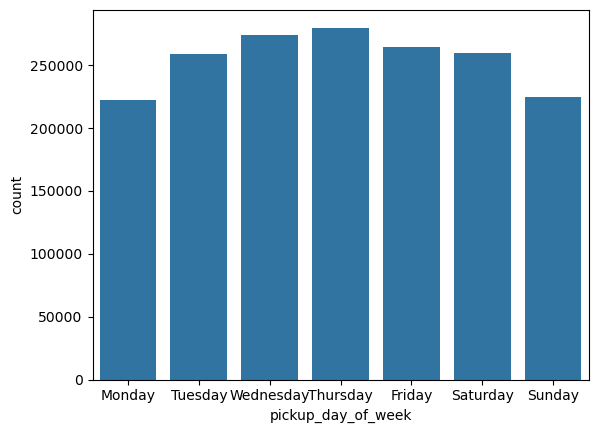

In [137]:
# Compare traffic trends for the week days and weekends

# Find and show the daily trends in taxi pickups (days of the week)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

merged_df['pickup_day_of_week'] = pd.Categorical(merged_df['pickup_day_of_week'], categories=week_order, ordered=True)

sns.countplot(x=merged_df['pickup_day_of_week'])
plt.show()

# Trips are high during Wednesday and Thursday and comparatively low for the weekend. However the number of trips are significant on the 
# weekend even though its a non-working day and this could be attributed to the visitors to the city using the taxi

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [138]:
# Find top 10 pickup and dropoff zones


pickup_count_data = merged_df.groupby('zone').size().reset_index(name='pickup_count')

pickup_top10 = pickup_count_data.sort_values(by='pickup_count', ascending=False).reset_index().head(10)

pickup_top10

,index,zone,pickup_count
0,115,JFK Airport,94987
1,222,Upper East Side South,86461
2,148,Midtown Center,85384
3,221,Upper East Side North,77099
4,149,Midtown East,65196
5,125,LaGuardia Airport,63699
6,173,Penn Station/Madison Sq West,62984
7,215,Times Sq/Theatre District,60714
8,129,Lincoln Square East,60478
9,157,Murray Hill,53985


In [139]:
# To find the top 10 drop off zones, first need to merge the df and the zones df with the DULocationID

zones.head()

zones_df = zones.copy()

zones_df = zones_df.rename(columns={'zone': 'zone_df'}).reset_index(drop=True)

zones_df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone_df,LocationID,borough,geometry,count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",47
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2
2,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1781
3,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",22
4,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",685


In [140]:
merged_df = pd.merge(merged_df, zones_df, left_on='DOLocationID', right_on='LocationID', how='inner')

In [141]:
dropoff_count_data = merged_df.groupby('zone_df').size().reset_index(name='dropoff_count')

In [142]:
dropoff_top10 = dropoff_count_data.sort_values(by='dropoff_count', ascending=False).head(10)

dropoff_top10

,zone_df,dropoff_count
220,Upper East Side North,80719
221,Upper East Side South,77016
148,Midtown Center,71001
214,Times Sq/Theatre District,55721
157,Murray Hill,53726
149,Midtown East,51731
129,Lincoln Square East,51066
223,Upper West Side South,50894
128,Lenox Hill West,48097
61,East Chelsea,45792


In [143]:
dropoff_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   zone_df        247 non-null    object
 1   dropoff_count  247 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [145]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

merged_zone_df = pd.merge(pickup_count_data, dropoff_count_data, left_on='zone', right_on='zone_df', how='inner')

In [146]:
merged_zone_df.head()

,zone,pickup_count,zone_df,dropoff_count
0,Alphabet City,1781,Alphabet City,6770
1,Arrochar/Fort Wadsworth,22,Arrochar/Fort Wadsworth,60
2,Astoria,685,Astoria,5036
3,Astoria Park,4,Astoria Park,38
4,Auburndale,6,Auburndale,172


In [147]:
merged_zone_df['pickup-dropoff-ratio'] = merged_zone_df['pickup_count'] / merged_zone_df['dropoff_count']

In [148]:
# Bottom 10 pickup/dropoff ratios

merged_zone_df.sort_values(by='pickup-dropoff-ratio', ascending=True).head(10)

,zone,pickup_count,zone_df,dropoff_count,pickup-dropoff-ratio
10,Bay Terrace/Fort Totten,1,Bay Terrace/Fort Totten,181,0.005525
126,Laurelton,2,Laurelton,321,0.006231
187,Rockaway Park,1,Rockaway Park,156,0.006410
165,Ocean Parkway South,1,Ocean Parkway South,137,0.007299
211,Sunset Park East,2,Sunset Park East,270,0.007407
108,Hollis,1,Hollis,109,0.009174
160,Newark Airport,47,Newark Airport,5120,0.009180
103,Hammels/Arverne,1,Hammels/Arverne,103,0.009709
11,Bayside,3,Bayside,305,0.009836
26,Bronxdale,1,Bronxdale,98,0.010204


In [149]:
# Top 10 pickup/dropoff ratios

merged_zone_df.sort_values(by='pickup-dropoff-ratio', ascending=False).head(10)

,zone,pickup_count,zone_df,dropoff_count,pickup-dropoff-ratio
63,East Elmhurst,8178,East Elmhurst,850,9.621176
115,JFK Airport,94987,JFK Airport,19270,4.929268
125,LaGuardia Airport,63699,LaGuardia Airport,21715,2.933410
173,Penn Station/Madison Sq West,62984,Penn Station/Madison Sq West,39643,1.588780
37,Central Park,30605,Central Park,22187,1.379411
100,Greenwich Village South,23964,Greenwich Village South,17401,1.377162
232,West Village,40199,West Village,30218,1.330300
149,Midtown East,65196,Midtown East,51731,1.260289
148,Midtown Center,85384,Midtown Center,71001,1.202575
91,Garment District,29920,Garment District,25020,1.195843


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [150]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hour_pickup_df = merged_df[(merged_df['pickup_hour'] >=23  ) | (merged_df['pickup_hour'] <=5 ) ]

pickup_count_night = night_hour_pickup_df.groupby(['PULocationID','zone']).size().reset_index(name='pickup_count_night')

top10_night_pickup = pickup_count_night.sort_values(by='pickup_count_night', ascending=False).head(10)

# Top 10 Pick up Zones between 11 pm and 5 am
top10_night_pickup

,PULocationID,zone,pickup_count_night
62,79,East Village,15389
97,132,JFK Airport,13677
193,249,West Village,12329
35,48,Clinton East,10285
113,148,Lower East Side,9525
85,114,Greenwich Village South,8667
175,230,Times Sq/Theatre District,8063
143,186,Penn Station/Madison Sq West,6845
127,164,Midtown South,6044
51,68,East Chelsea,5909


In [151]:

merged_df['dropoff_hour'] = merged_df['tpep_dropoff_datetime'].dt.hour
merged_df['dropoff_day_of_week'] = merged_df['tpep_dropoff_datetime'].dt.strftime('%A')   # e.g., Mon, Tue
merged_df['dropoff_month'] = merged_df['tpep_dropoff_datetime'].dt.strftime('%B')
merged_df['dropoff_year'] = merged_df['tpep_dropoff_datetime'].dt.year
merged_df['dropoff_quarter'] = merged_df['tpep_dropoff_datetime'].dt.to_period('Q')



In [152]:

night_hour_dropoff_df = merged_df[(merged_df['dropoff_hour'] >=23  ) | (merged_df['dropoff_hour'] <=5 ) ]

dropoff_count_night = night_hour_pickup_df.groupby(['DOLocationID','zone_df']).size().reset_index(name='dropoff_count_night')

top10_night_dropoff = dropoff_count_night.sort_values(by='dropoff_count_night', ascending=False).head(10)

# Top 10 Drop Off Zones between 11 pm and 5 am
top10_night_dropoff

,DOLocationID,zone_df,dropoff_count_night
73,79,East Village,8215
43,48,Clinton East,6783
157,170,Murray Hill,6180
62,68,East Chelsea,5740
96,107,Gramercy,5679
128,141,Lenox Hill West,5222
244,263,Yorkville West,4923
230,249,West Village,4875
212,230,Times Sq/Theatre District,4542
211,229,Sutton Place/Turtle Bay North,4333


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [153]:
# Filter for night hours (11 PM to 5 AM)

total_revenue = merged_df['total_amount'].sum().round(2)
total_revenue

night_hour_revenue = night_hour_pickup_df['total_amount'].sum().round(2)
night_hour_revenue

day_hour_revenue = total_revenue - night_hour_revenue
day_hour_revenue

print('Day Time Revenue :', day_hour_revenue)

print('Day Time Revenue Share:', ((day_hour_revenue / total_revenue)*100).round(2),'%')

print('Night Time Revenue : ', night_hour_revenue)

print('Night Time Revenue Share:', ((night_hour_revenue / total_revenue)*100).round(2),'%')


Day Time Revenue : 44245956.66
Day Time Revenue Share: 88.08 %
Night Time Revenue :  5988058.13
Night Time Revenue Share: 11.92 %


In [186]:
# Filter for night hours (11 PM to 5 AM)

total_count = merged_df['pickup_hour'].count()
total_count

night_hour_count = night_hour_pickup_df['pickup_hour'].count()
night_hour_count

day_hour_count = total_count - night_hour_count
day_hour_count

print('Day Time Count :', day_hour_count)

print('Day Time Count Share:', ((day_hour_count / total_count)*100).round(2),'%')

print('Night Time Count : ', night_hour_count)

print('Night Time Count Share:', ((night_hour_count / total_count)*100).round(2),'%')


Day Time Count : 1563102
Day Time Count Share: 88.21 %
Night Time Count :  209003
Night Time Count Share: 11.79 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [154]:
# # Analyse the fare per mile per passenger for different passenger counts

# Removing records for which the trip distance is equsl to 0 and the passenger count is equal to 0 

fare_analysis_df = merged_df[(merged_df['trip_distance'] > 0) & (merged_df['passenger_count'] > 0)]

fare_analysis_df['fare_per_mile'] = (fare_analysis_df['fare_amount'] / fare_analysis_df['trip_distance']).round(2)

fare_analysis_df['fare_per_mile_per_passenger'] = (
    (fare_analysis_df['fare_amount'] / fare_analysis_df['trip_distance']) / fare_analysis_df['passenger_count']).round(2)


In [155]:
groupedby_fare = fare_analysis_df.groupby(['passenger_count']).agg(
     avg_fare = ('fare_per_mile_per_passenger', 'mean')).reset_index()

groupedby_fare.head(25)

,passenger_count,avg_fare
0,1.0,10.703591
1,2.0,6.256738
2,3.0,3.809569
3,4.0,4.094672
4,5.0,1.693493
5,6.0,1.350450


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [156]:
# Compare the average fare per mile for different days and for different times of the day


groupedby_fare = fare_analysis_df.groupby(['passenger_count', 'pickup_day_of_week','pickup_hour']).agg(
    avg_fare = ('fare_per_mile', 'mean')).reset_index()

groupedby_fare.head()

,passenger_count,pickup_day_of_week,pickup_hour,avg_fare
0,1.0,Monday,0,10.464357
1,1.0,Monday,1,11.778508
2,1.0,Monday,2,7.174730
3,1.0,Monday,3,13.853375
4,1.0,Monday,4,10.670823


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [157]:
# Compare fare per mile for different vendors

groupedby_fare_per_vendor = fare_analysis_df.groupby('VendorID').agg(
    avg_fare_per_vendor = ('fare_per_mile', 'mean')
).reset_index()

groupedby_fare_per_vendor.head()

# Average fare for Vendor : 'Verifone Inc' is more than 'Creative Mobile Technologies , LLC'

,VendorID,avg_fare_per_vendor
0,1,8.066164
1,2,12.062010


In [158]:
groupedby_fare_per_vendor = fare_analysis_df.groupby('VendorID').agg(
    trip_count_vendor = ('passenger_count', 'count')
).reset_index()

groupedby_fare_per_vendor.head()

# Number of trips done by Vendor: 'Verifone Inc' is more than 'Creative Mobile Technologies , LLC'

,VendorID,trip_count_vendor
0,1,429234
1,2,1314688


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [159]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')]
labels = ['Upto 2 miles', 'Bet 2 - 5 miles', 'Greater than 5 miles']

fare_analysis_df['dist_tier'] = pd.cut(fare_analysis_df['trip_distance'], bins=bins, labels=labels)

In [160]:
tiered_fare = fare_analysis_df.groupby(['VendorID', 'dist_tier']).agg(
    tiered_fare = ('fare_per_mile', 'mean')
).reset_index().round(2)

In [161]:
tiered_fare.head()

,VendorID,dist_tier,tiered_fare
0,1,Upto 2 miles,9.75
1,1,Bet 2 - 5 miles,6.35
2,1,Greater than 5 miles,4.44
3,2,Upto 2 miles,17.25
4,2,Bet 2 - 5 miles,6.54


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [162]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
fare_analysis_df['tip_perc'] = ((fare_analysis_df['tip_amount'] / fare_analysis_df['fare_amount'])*100).round(2)

tip_analysis_df = fare_analysis_df.groupby(['dist_tier','passenger_count','pickup_hour']).agg(
    tip_perc_analyis = ('tip_perc', 'mean')
).reset_index()
    
tip_analysis_df.head()

,dist_tier,passenger_count,pickup_hour,tip_perc_analyis
0,Upto 2 miles,1.0,0,23.646668
1,Upto 2 miles,1.0,1,23.914816
2,Upto 2 miles,1.0,2,24.097279
3,Upto 2 miles,1.0,3,24.410263
4,Upto 2 miles,1.0,4,21.892205


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [163]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [164]:
# See how passenger count varies across hours and days

passenger_count_df = fare_analysis_df.groupby(['pickup_day_of_week','passenger_count']).agg(
    pass_count_analysis = ('passenger_count', 'count')
).reset_index()

passenger_count_df.head(25)


,pickup_day_of_week,passenger_count,pass_count_analysis
0,Monday,1.0,168848
1,Monday,2.0,31710
2,Monday,3.0,7657
3,Monday,4.0,4063
4,Monday,5.0,2815
5,Monday,6.0,1967
6,Tuesday,1.0,201951
7,Tuesday,2.0,33785
8,Tuesday,3.0,7729
9,Tuesday,4.0,4159


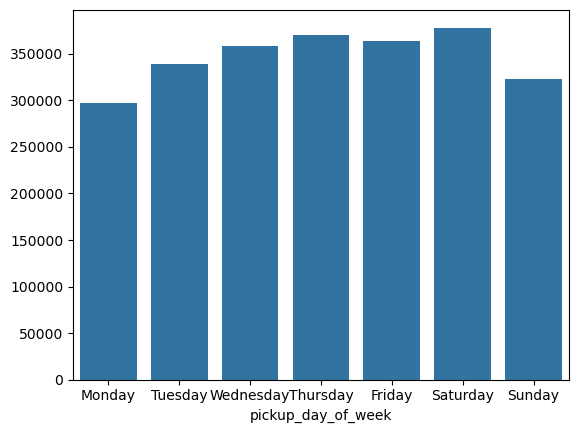

In [165]:
passenger_count_weekday = fare_analysis_df.groupby('pickup_day_of_week')['passenger_count'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.barplot(x=passenger_count_weekday.index, y=passenger_count_weekday.values)
plt.show()


# Though the number of trips is not the highest on Saturday, the passenger count is highest on Saturday
# This hig count can be attributed to visitors to the city

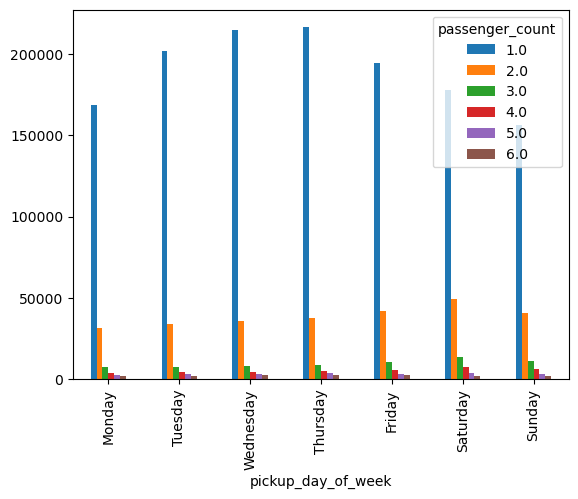

In [166]:
passenger_count_weekday_grouped = fare_analysis_df.groupby(['pickup_day_of_week','passenger_count']).size().reset_index(name='trip_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

passenger_count_weekday_grouped['pickup_day_of_week'] = pd.Categorical(passenger_count_weekday_grouped['pickup_day_of_week'], 
                                                                      categories=ordered_days, ordered=True)
pivot_df = passenger_count_weekday_grouped.pivot(index='pickup_day_of_week', columns='passenger_count', values='trip_count')

pivot_df.plot(kind='bar')
plt.show()




In [167]:
passenger_count_df = fare_analysis_df.groupby(['pickup_hour','passenger_count']).agg(
    pass_count_analysis = ('passenger_count', 'count')
).reset_index()

passenger_count_df.head(25)

,pickup_hour,passenger_count,pass_count_analysis
0,0,1.0,36081
1,0,2.0,8446
2,0,3.0,2059
3,0,4.0,1201
4,0,5.0,784
5,0,6.0,388
6,1,1.0,24055
7,1,2.0,5674
8,1,3.0,1404
9,1,4.0,816


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [168]:
# How does passenger count vary across zones

passenger_across_zone_df = fare_analysis_df.groupby('zone').agg(
    total_passengers = ('passenger_count', 'sum')
).reset_index()

passenger_across_zone_df.sort_values(by='total_passengers', ascending=False).head(25)

# Highest number of passengers getting picked up is from JFK Airport

,zone,total_passengers
113,JFK Airport,135763.0
145,Midtown Center,117034.0
217,Upper East Side South,114312.0
216,Upper East Side North,101980.0
210,Times Sq/Theatre District,89285.0
146,Midtown East,85726.0
123,LaGuardia Airport,84720.0
170,Penn Station/Madison Sq West,83517.0
127,Lincoln Square East,82628.0
147,Midtown North,73565.0


In [169]:
# How does passenger count vary across zones

passenger_across_zone_df = fare_analysis_df.groupby('zone_df').agg(
    total_passengers = ('passenger_count', 'sum')
).reset_index()

passenger_across_zone_df.sort_values(by='total_passengers', ascending=False).head(25)

# Highest number of passengers dropped of at Upper East Side and Midtown NY

,zone_df,total_passengers
220,Upper East Side North,106996.0
221,Upper East Side South,101797.0
148,Midtown Center,97627.0
214,Times Sq/Theatre District,85536.0
157,Murray Hill,72326.0
149,Midtown East,69711.0
223,Upper West Side South,69334.0
129,Lincoln Square East,68783.0
128,Lenox Hill West,64365.0
61,East Chelsea,63922.0


In [170]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [171]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Using the pick-up/drop-off ratio, it can be concluded that
* For a high pick-up/drop-off ratio: Taxis are sitting idle till the next pick-up or have to travel to the next location to get a pick-up
* For a low pick-up/drop-off ratio: There is a shortage of taxis to serve that location and a lost business opportunity


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

There is a high pick-up from JFK Airport so stretgically positioning cabs around the airport is necessary.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Vendor "Creative Mobile Technologies , LLC" has only a 25% share of the ride count even though the average fare per ride is less than Vendor "VeriFone Inc.". There is a big opportunity for "Creative Mobile Technologies , LLC" to increase its revenue if it is able to get a bigger share and serving the routes on which there is a high demand.